In [1]:
# project: p2
# submitter: emanter
# partner: none
# hours: 8


In [2]:
import loans
from search import BST, Node
import time
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
applicant = loans.Applicant("20-30", ["1", "2", "3"])
applicant.race

{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [5]:
applicant

Applicant('20-30', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])

In [6]:
applicant.lower_age()

20

In [7]:
sorted([
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
])


[Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American']),
 Applicant('<25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('>75', ['Other Pacific Islander', 'Samoan'])]

In [8]:
values = {'activity_year': '2021', 'lei': '549300Q76VHK6FGPX546', 'derived_msa-md': '24580', 'state_code': 'WI','county_code': '55009',
          'census_tract': '55009020702', 'conforming_loan_limit': 'C', 'derived_loan_product_type': 'Conventional:First Lien',
          'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built', 'derived_ethnicity': 'Not Hispanic or Latino',
          'derived_race': 'White', 'derived_sex': 'Joint', 'action_taken': '1', 'purchaser_type': '1', 'preapproval': '2', 'loan_type': '1',
          'loan_purpose': '31', 'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '2', 'business_or_commercial_purpose': '2',
          'loan_amount': '325000.0', 'loan_to_value_ratio': '73.409', 'interest_rate': '2.5', 'rate_spread': '0.304', 'hoepa_status': '2',
          'total_loan_costs': '3932.75', 'total_points_and_fees': 'NA', 'origination_charges': '3117.5', 'discount_points': '', 'lender_credits': '',
          'loan_term': '240', 'prepayment_penalty_term': 'NA', 'intro_rate_period': 'NA', 'negative_amortization': '2', 'interest_only_payment': '2',
          'balloon_payment': '2', 'other_nonamortizing_features': '2', 'property_value': '445000', 'construction_method': '1', 'occupancy_type': '1',
          'manufactured_home_secured_property_type': '3', 'manufactured_home_land_property_interest': '5', 'total_units': '1',
          'multifamily_affordable_units': 'NA', 'income': '264', 'debt_to_income_ratio': '20%-<30%', 'applicant_credit_score_type': '2',
          'co-applicant_credit_score_type': '9', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '', 'applicant_ethnicity-3': '',
          'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '', 'co-applicant_ethnicity-1': '2', 'co-applicant_ethnicity-2': '',
          'co-applicant_ethnicity-3': '', 'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
          'co-applicant_ethnicity_observed': '2', 'applicant_race-1': '5', 'applicant_race-2': '', 'applicant_race-3': '', 'applicant_race-4': '',
          'applicant_race-5': '', 'co-applicant_race-1': '5', 'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '',
          'co-applicant_race-5': '', 'applicant_race_observed': '2', 'co-applicant_race_observed': '2', 'applicant_sex': '1',
          'co-applicant_sex': '2', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '2', 'applicant_age': '35-44',
          'co-applicant_age': '35-44', 'applicant_age_above_62': 'No', 'co-applicant_age_above_62': 'No', 'submission_of_application': '1',
          'initially_payable_to_institution': '1', 'aus-1': '1', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '10',
          'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '6839',
          'tract_minority_population_percent': '8.85999999999999943', 'ffiec_msa_md_median_family_income': '80100',
          'tract_to_msa_income_percentage': '150', 'tract_owner_occupied_units': '1701', 'tract_one_to_four_family_homes': '2056',
          'tract_median_age_of_housing_units': '15'}

In [9]:
loan = loans.Loan(values)
loan.interest_rate

2.5

In [10]:
loan.applicants

[Applicant('35-44', ['White']), Applicant('35-44', ['White'])]

In [11]:
loan.loan_amount

325000.0

In [12]:
loan.property_value

445000.0

In [13]:
print(loan)
loan

<Loan: 2.5% on $445000.0 with 2 applicant(s)>


<Loan: 2.5% on $445000.0 with 2 applicant(s)>

In [14]:
for amt in loan.yearly_amounts(30000):
    print(amt)

325000.0
303125.0
280703.125
257720.703125
234163.720703125
210017.81372070312
185268.2590637207
159899.96554031371
133897.46467882156
107244.90129579211
79926.02382818691
51924.174423891585
23222.278784488873


In [15]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu.lei

'254900CN1DD55MJDFH69'

In [16]:
uwcu.load_from_zip("./wi.zip")

In [17]:
uwcu[-1]

<Loan: 2.99% on $185000.0 with 2 applicant(s)>

In [18]:
len(uwcu)

21153

In [19]:
bank1 = loans.Bank("First Home Bank")
bank1.load_from_zip("wi.zip")
len(bank1)

45

In [20]:
bank1[10]

<Loan: 2.75% on $305000.0 with 1 applicant(s)>

In [21]:
tree = BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

C : [33]
B : [22]
A : [9, 5]


In [22]:
t = BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4


In [23]:
t.root.lookup("A")

[2]

In [24]:
bank = loans.Bank("Charles Schwab Bank, SSB")

In [25]:
bank.load_from_zip("./wi.zip")

In [26]:
#Q1
average = bank.average_interest_rate()
average

2.957772277227724

In [27]:
#Q2
avg = bank.num_applicants() / len(bank)
avg

1.7227722772277227

In [28]:
#Q3
it = bank.ages_dict()
it

{'25-34': 5, '35-44': 25, '45-54': 36, '55-64': 55, '65-74': 41, '>74': 12}

In [29]:
tre = BST()
for loan in bank.loanlist:
    tre.add(loan.interest_rate, loan)

In [30]:
#Q4
len(tre[-1])

1

In [31]:
#Q5
tre.get_height(tre.root)

9

In [32]:
bank1 = loans.Bank("University of Wisconsin Credit Union")

In [33]:
bank1.load_from_zip("./wi.zip")

In [34]:
tr = BST()
amount = 0
dicty = {}
timern = time.time()
for loan in bank1.loanlist:
    tr.add(loan.interest_rate, loan)
    time1 = time.time()
    amount += 1
    dicty[amount] = (time1 - timern) * 1000

Text(0.5, 0, 'BST Adds')

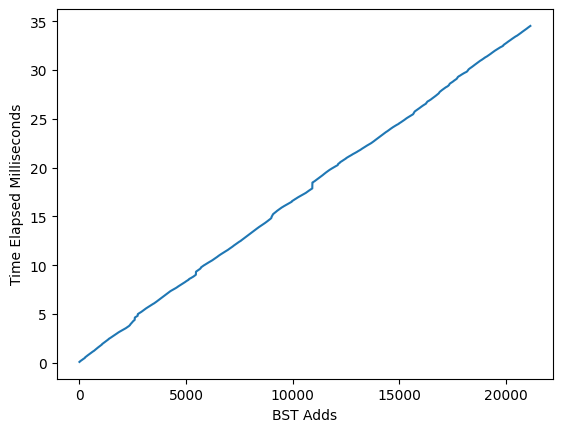

In [35]:
#Q6
g = pd.Series(dicty).plot.line()
g.set_ylabel("Time Elapsed Milliseconds")
g.set_xlabel("BST Adds")

Text(0, 0.5, 'Milliseconds')

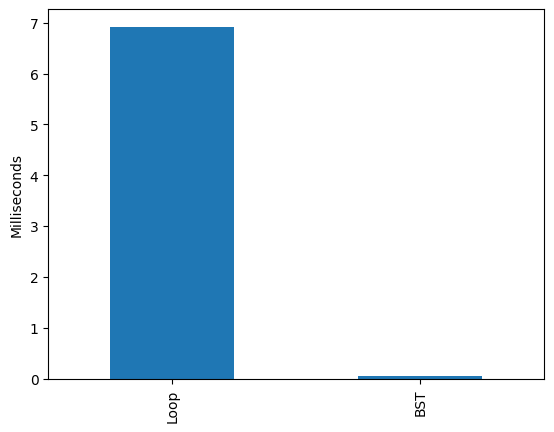

In [36]:
#Q7
counter = 0
timern = time.time()
lo = {}
for loan in bank1.loanlist:
    if int(loan.interest_rate) == -1:
        counter += 1
time2 = time.time()
lo["Loop"] = (time2 - timern) *1000

timern = time.time()
len(tr[-1])
t2 = time.time()
lo["BST"] = (t2 - timern) * 1000

gr = pd.Series(lo).plot.bar()
gr.set_ylabel("Milliseconds")

<AxesSubplot:>

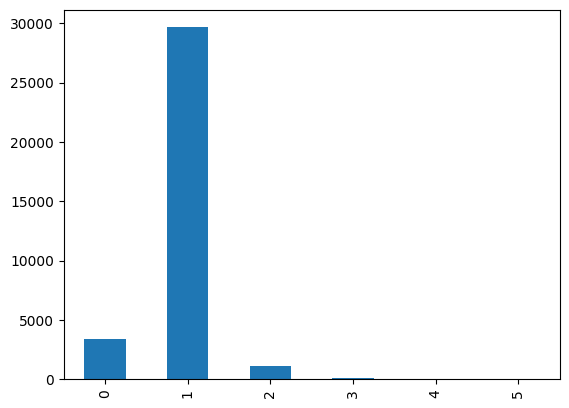

In [37]:
#Q8
di = {}
for loan in bank1.loanlist:
    for applicant in loan.applicants:
        if len(applicant.race) not in di:
            di[len(applicant.race)] = 1
        else:
            di[len(applicant.race)] += 1

s = pd.Series(dict((sorted(di.items()))))
gp = s.plot.bar()
gp

In [38]:
#Q9
nonleaf = tr.total(tr.root) - tr.num_nonleaf_nodes(tr.root)
nonleaf

9

In [39]:
#Q10
he = tr.top(tr.root, 4)[0]
he

5.0